# The Facility Dispersion Problem

## p-dispersion

$$
\begin{align}
    \text{max} \quad & D \\
    \text{s.t} \quad & \sum_{i \in V} x_{i} = p & \forall \; i \in V \\
    & z_{i, j} \leq x_{i} & \forall \; i, j \in A \\
    & z_{i, j} \leq x_{j} & \forall \; i, j \in A \\
    & x_{i} + x_{j} - 1 \leq z_{i, j} & \forall \; i, j \in A \\
    & D \leq d_{i, j} + M (1 - z_{i, j}) & \forall \; i, j \in A \\
    & x_{i} \in \{0, 1\} & \forall \; i \in V \\
    & z_{i, j} \in \{0, 1\} & \forall \; i, j \in A \\
\end{align}
$$

## maxisum

$$
\begin{align}
    \text{max} \quad & \sum_{i \in V}\sum_{j \in V} d_{i, j} z_{i, j} \\
    \text{s.t} \quad & d_{opt} \leq D \\
\end{align}
$$

In [4]:
import json

In [5]:
import numpy as np
import pandas as pd
import pyomo.environ as pyo
from scipy.spatial import distance as sci_dist

In [6]:
import plotly.express as px
import matplotlib.pyplot as plt

## Read input data

In [7]:
with open("./data/data_25_5.json", mode="r") as file:
    data = json.load(file)

N = len(data["coordinates"])
coordinates = np.array(data["coordinates"])
weights = sci_dist.squareform(sci_dist.pdist(coordinates))
coordinates.shape, weights.shape

((25, 2), (25, 25))

In [8]:
# number of points to select
p = data["p"]
p

5

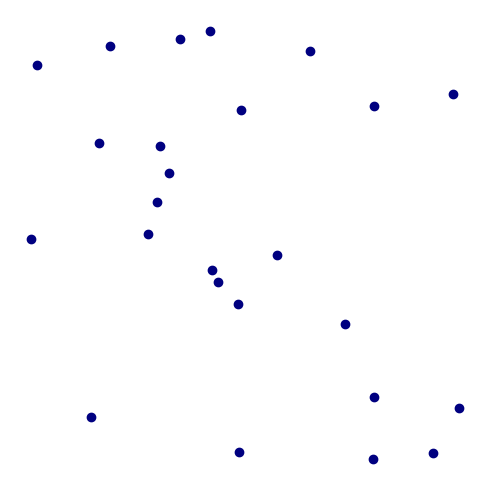

In [9]:
fig, ax = plt.subplots(figsize=[5, 5], dpi=100)
ax.scatter(
    coordinates[:, 0],
    coordinates[:, 1],
    color="navy"
)

ax.axis('off')

fig.tight_layout()
plt.show()

## Model

In [10]:
model = pyo.ConcreteModel()

### Sets of Nodes and Arcs

In [11]:
model.nodes = pyo.Set(initialize=range(weights.shape[0]))
model.arcs = pyo.Set(
    initialize=[(i, j) for i in range(weights.shape[0]) for j in range(weights.shape[0]) if i != j]
)

### Parameters

In [ ]:
model.d = pyo.Param(model.A, initialize={(i, j): weights[i, j] for (i, j) in model.A})
model.p = pyo.Param(initialize=p)

# # Big M
# model.M = pyo.Param(initialize=###)

In [ ]:
# Decision variables
# model.x = pyo.Var(###, within=###)
# model.z = pyo.Var(###, within=###)
# model.D = pyo.Var(within=###)

In [ ]:
# Constraints
# def p_selection(###):
#     return ###


# def dispersion_c1(###):
#     return ###


# def dispersion_c2(###):
#     return ###


# def dispersion_c3(###):
#     return ###


# def maxmin_rule(###):
#     return ###


# Set model attributes
# model.p_selection = pyo.Constraint(rule=p_selection)
# model.dispersion_c1 = pyo.Constraint(###, rule=dispersion_c1)
# model.dispersion_c2 = pyo.Constraint(###, rule=dispersion_c2)
# model.dispersion_c3 = pyo.Constraint(###, rule=dispersion_c3)
# model.maxmin_rule = pyo.Constraint(###, rule=maxmin_rule)

In [ ]:
# Objectives
# model.obj_pdisp = pyo.Objective(expr=###, sense=###)


# def obj_maxisum(model):
#     return ###


# model.obj_maxisum = pyo.Objective(rule=obj_maxisum, sense=pyo.maximize)
# model.obj_maxisum.deactivate()

## Solve

In [ ]:
# Function to solve model
def solve_model(model, solver, **kwargs):

    # Solve p-dispersion problem
    solver.solve(model, **kwargs)

    # Include constraint that does not allow objective degradation
    d_opt = model.obj_pdisp()
    model.pdisp_degradation = pyo.Constraint(expr=d_opt <= model.D)

    # Change active objective
    model.obj_pdisp.deactivate()
    model.obj_maxisum.activate()

    # Solve maxisum model
    solver.solve(model, **kwargs)

In [ ]:
solver = pyo.SolverFactory("appsi_highs")
solver.options["time_limit"] = 180
solve_model(model, solver, tee=True)

In [ ]:
fig, ax = plt.subplots(figsize=[5, 5], dpi=100)
facilities = np.array([i for i in model.x if np.isclose(model.x[i].value, 1)])

ax.scatter(
    coordinates[:, 0],
    coordinates[:, 1],
    color="navy"
)

ax.scatter(
    coordinates[facilities, 0],
    coordinates[facilities, 1],
    color="firebrick",
    label="Facilities"
)

ax.axis('off')

fig.tight_layout()
plt.show()